# Librerias

In [10]:
library(bnlearn)
library(Rgraphviz)

rtp = read.csv("data/ARIA_cleaned/PlanRT.csv", row.names=1)

# Datos

In [11]:
# cols = c('TreatmentOrder', 'PlanNormFactor_isNaN', 'PrescribedPercentage', 'Site', 'CityOrTownship', 'Status_x', 'Country', 'FractionPatternDigitsPerDay', 'Technique', 'SkinFlashMargin', 'TreatmentIntentType', 'DateOfBirth_isNaN', 'SimulationNeeded', 'StartDelay_isNaN', 'PrimaryPTVSer_isNaN', 'PlanNormMethod', 'FirstName', 'Status_y', 'TreatmentOrientation', 'Notes', 'DicomSeqNumber', 'FractionPattern', 'PrescribedDose_isNaN', 'BolusFrequency', 'EquipmentSer', 'PhaseType', 'CalcModelOptions', 'BolusThickness', 'InterfaceStamp', 'Intent', 'NumberOfFractions_isNaN', 'MultiFieldOptFlag', 'NoFractions_isNaN', 'ClinicalStatus', 'Sex')
cols = c('PrescribedPercentage', 'NoFractions', 'PrescribedDose', 'Status_x', 'ClinicalStatus', 'MultiFieldOptFlag', 'DicomSeqNumber', 'SkinFlashMargin', 'StartDelay', 'BolusThickness', 'PlanNormMethod', 'FractionPattern', 'BolusFrequency', 'Technique', 'PhaseType', 'DateOfBirth', 'CalcModelOptions', 'Intent', 'PrimaryPTVSer', 'InterfaceStamp', 'TreatmentOrientation', 'CityOrTownship', 'PlanNormFactor', 'Site', 'NumberOfFractions', 'EquipmentSer', 'Status_y', 'CalcModelOptionsLen', 'Notes', 'TreatmentOrder', 'Sex', 'TreatmentIntentType', 'Country', 'FirstName', 'SimulationNeeded', 'FractionPatternDigitsPerDay')

length(cols)

[1] 36

In [12]:
rtp[cols] <- lapply(rtp[cols], factor)

In [13]:
dim(rtp[cols])
head(rtp[cols])

[1] 14157    36

,PrescribedPercentage,NoFractions,PrescribedDose,Status_x,ClinicalStatus,MultiFieldOptFlag,DicomSeqNumber,SkinFlashMargin,StartDelay,BolusThickness,...,Status_y,CalcModelOptionsLen,Notes,TreatmentOrder,Sex,TreatmentIntentType,Country,FirstName,SimulationNeeded,FractionPatternDigitsPerDay
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
71,1.0,"NoFractions_(10.0, 23.0]","PrescribedDose_(0.002, 2.0]",PlanApproval,ACTIVE,0,1,20.0,isNaN,isNaN,...,isNaN,,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN
113,1.0,"NoFractions_(0.0, 1.0]",isNaN,PlanApproval,ACTIVE,1,1,isNaN,isNaN,isNaN,...,isNaN,,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN
116,1.0,"NoFractions_(0.0, 1.0]",isNaN,TreatApproval,ACTIVE,0,1,20.0,,isNaN,...,isNaN,,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,1.0
117,1.0,"NoFractions_(0.0, 1.0]",isNaN,TreatApproval,ACTIVE,0,1,20.0,,isNaN,...,isNaN,,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,1.0
118,1.0,"NoFractions_(0.0, 1.0]",isNaN,Unapproved,ACTIVE,0,1,20.0,isNaN,isNaN,...,isNaN,,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN
119,1.0,"NoFractions_(0.0, 1.0]",isNaN,Unapproved,ACTIVE,0,1,20.0,isNaN,isNaN,...,isNaN,,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN


# Aprendizaje de estructura

In [14]:
hcdag <- hc(rtp[cols])
tabudag <- tabu(rtp[cols])

In [18]:
score(hcdag, data = rtp[cols], type = "bic")
score(tabudag, data = rtp[cols], type = "bic")
arc.strength(hcdag, data = rtp[cols], criterion = "x2")

print(hcdag)
# plot(hcdag)
# print(tabudag)

[1] -273196.6

[1] -273196.6

,from,to,strength
,<chr>,<chr>,<dbl>
1,CalcModelOptions,CalcModelOptionsLen,0.000000e+00
2,PlanNormMethod,Intent,0.000000e+00
3,MultiFieldOptFlag,SkinFlashMargin,0.000000e+00
4,Site,NumberOfFractions,0.000000e+00
5,NumberOfFractions,Technique,0.000000e+00
6,CalcModelOptionsLen,PlanNormMethod,0.000000e+00
7,NumberOfFractions,PhaseType,0.000000e+00
8,PhaseType,SimulationNeeded,0.000000e+00
9,SimulationNeeded,Status_y,0.000000e+00



  Bayesian network learned via Score-based methods

  model:
   [FractionPattern][BolusFrequency][InterfaceStamp][TreatmentOrder]
   [EquipmentSer|InterfaceStamp][FractionPatternDigitsPerDay|FractionPattern]
   [MultiFieldOptFlag|InterfaceStamp:EquipmentSer]
   [SkinFlashMargin|MultiFieldOptFlag][PrescribedPercentage|SkinFlashMargin]
   [CalcModelOptions|SkinFlashMargin:InterfaceStamp]
   [CalcModelOptionsLen|CalcModelOptions]
   [PlanNormMethod|SkinFlashMargin:CalcModelOptionsLen]
   [TreatmentOrientation|SkinFlashMargin:CalcModelOptionsLen]
   [Intent|PlanNormMethod][PlanNormFactor|PlanNormMethod][Status_x|Intent]
   [StartDelay|Intent:CalcModelOptionsLen]
   [PrimaryPTVSer|Intent:CalcModelOptionsLen]
   [DicomSeqNumber|MultiFieldOptFlag:StartDelay][Site|PrimaryPTVSer]
   [NumberOfFractions|Site][PrescribedDose|SkinFlashMargin:NumberOfFractions]
   [Technique|NumberOfFractions][PhaseType|NumberOfFractions]
   [Notes|NumberOfFractions][NoFractions|PrescribedDose:StartDelay]
   [Treat

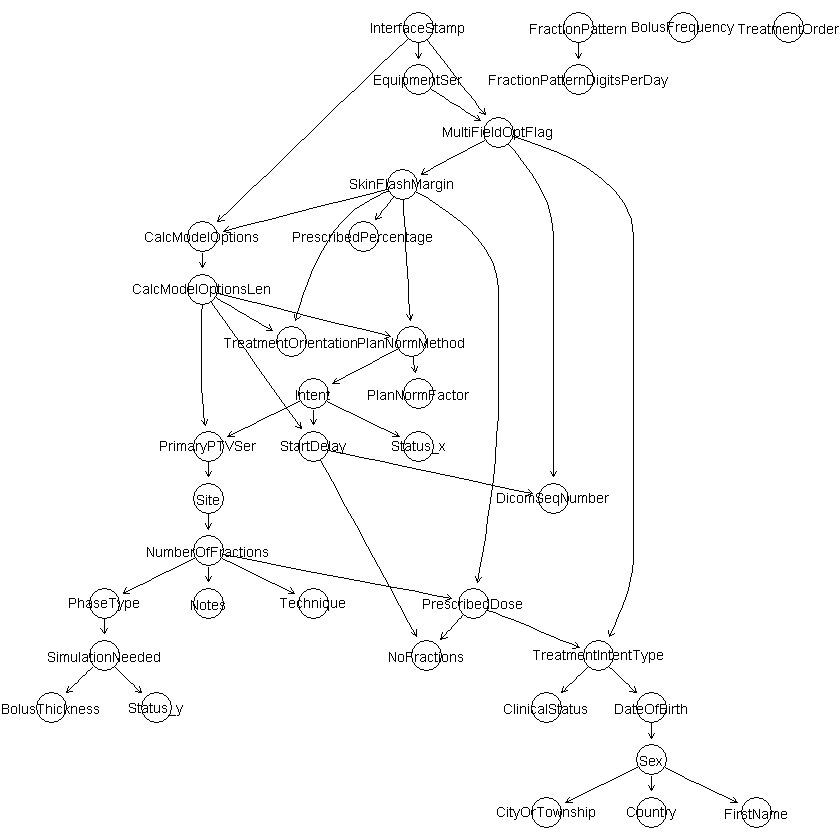

In [16]:
# graphviz.plot(hcdag)
# graphviz.plot(tabudag)

g <- Rgraphviz::layoutGraph(bnlearn::as.graphNEL(hcdag))
graph::nodeRenderInfo(g) <- list(fontsize=90)
Rgraphviz::renderGraph(g)

In [19]:
vstructs(hcdag)

X,Z,Y
PrescribedDose,NoFractions,StartDelay
SkinFlashMargin,PrescribedDose,NumberOfFractions
MultiFieldOptFlag,DicomSeqNumber,StartDelay
Intent,StartDelay,CalcModelOptionsLen
SkinFlashMargin,PlanNormMethod,CalcModelOptionsLen
SkinFlashMargin,CalcModelOptions,InterfaceStamp
Intent,PrimaryPTVSer,CalcModelOptionsLen
SkinFlashMargin,TreatmentOrientation,CalcModelOptionsLen
PrescribedDose,TreatmentIntentType,MultiFieldOptFlag


# Aprendizaje de parámetros

In [17]:
bn.bayes <- bn.fit(hcdag, data = rtp[cols], method = "bayes")
nparams(bn.bayes)
bn.bayes$PrescribedPercentage
# bn.bayes$Notes

[1] 2482


  Parameters of node PrescribedPercentage (multinomial distribution)

Conditional probability table:
 
                    SkinFlashMargin
PrescribedPercentage         20.0        isNaN
               0.2   1.404287e-03 1.330035e-05
               0.5   1.116038e-02 1.330035e-05
               0.914 1.372611e-04 1.330035e-05
               1.0   9.870235e-01 9.999335e-01
               1.104 1.372611e-04 1.330035e-05
               isNaN 1.372611e-04 1.330035e-05